In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('BankChurners.csv')

In [3]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [4]:
df= df[df.columns[:-2]]

In [5]:
df.shape

(10127, 21)

In [6]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df=df.drop(columns=['CLIENTNUM'])

In [8]:
df.shape

(10127, 20)

In [9]:
df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [10]:
df=df.drop_duplicates()

In [11]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


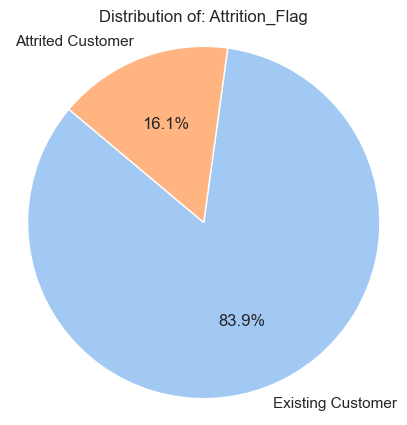

<Figure size 640x480 with 0 Axes>

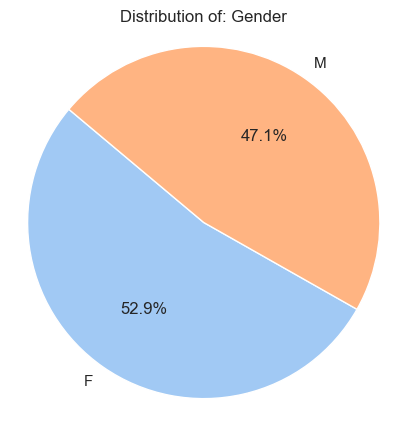

<Figure size 640x480 with 0 Axes>

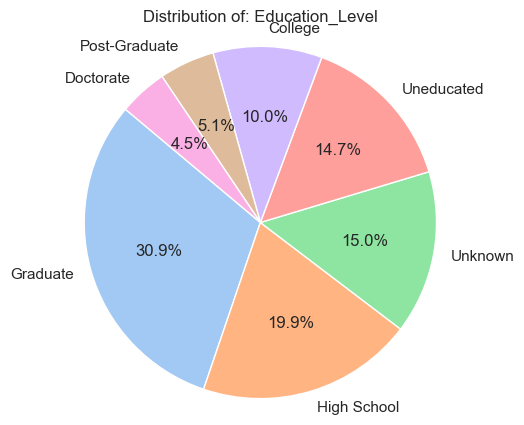

<Figure size 640x480 with 0 Axes>

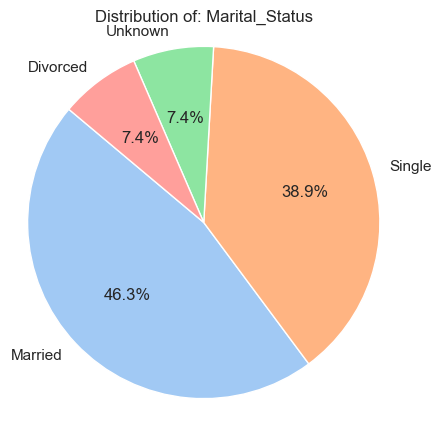

<Figure size 640x480 with 0 Axes>

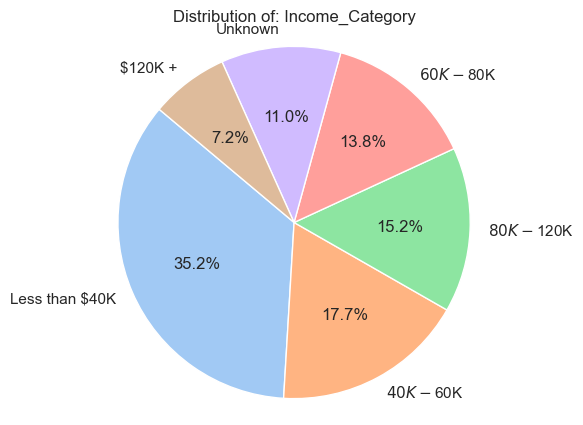

<Figure size 640x480 with 0 Axes>

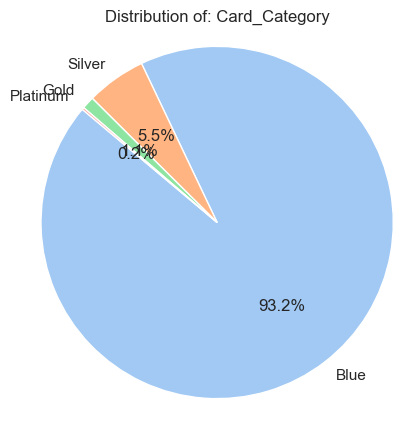

<Figure size 640x480 with 0 Axes>

In [12]:
categorical_list = df.select_dtypes(include=['object']).columns.tolist()

for i in categorical_list: 
    # Calculate value counts for the 'Category' column
    value_counts = df[i].value_counts()

    plt.figure(figsize=(5,5))
    sns.set(style="whitegrid")
    sns.color_palette("pastel")
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
    plt.title('Distribution of: '+i)
    plt.show()
    plt.close()

    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [13]:
df.Attrition_Flag = df.Attrition_Flag.replace({'Existing Customer':1,'Attrited Customer':0})
df.Gender = df.Gender.replace({'F':0,'M':1})
df.Marital_Status = df.Marital_Status.replace({'Single':0,'Married':1,'Divorced':2,'Unknown':3})
df.Card_Category= df.Card_Category.replace({'Blue':0,'Silver':1,'Gold':2,'Platinum':3})

In [14]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,High School,1,$60K - $80K,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,Graduate,0,Less than $40K,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,Graduate,1,$80K - $120K,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,High School,3,Less than $40K,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,Uneducated,1,$60K - $80K,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,Graduate,0,$40K - $60K,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,Unknown,2,$40K - $60K,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,High School,1,Less than $40K,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,Graduate,3,$40K - $60K,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [15]:
# df = pd.concat([df, pd.get_dummies(df['Education_Level']).drop(columns=['Unknown'])], axis=1)
# df = pd.concat([df, pd.get_dummies(df['Income_Category']).drop(columns=['Unknown'])], axis=1)
# # Drop original categorical columns
# df.drop(columns=['Education_Level', 'Income_Category'], inplace=True)
# # Convert boolean columns to integers (True/False to 1/0)
# df = df.astype(int)
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Education_Level']=le.fit_transform(df['Education_Level'])
df['Income_Category']=le.fit_transform(df['Income_Category'])




In [16]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,0,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,0,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,6,2,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [17]:
df.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,0,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,1,44,1,2,2,1,1,0,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,1,51,1,4,6,1,0,2,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,1,32,1,0,3,3,2,1,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,1,37,1,3,5,0,2,0,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,1,48,1,2,2,0,3,0,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


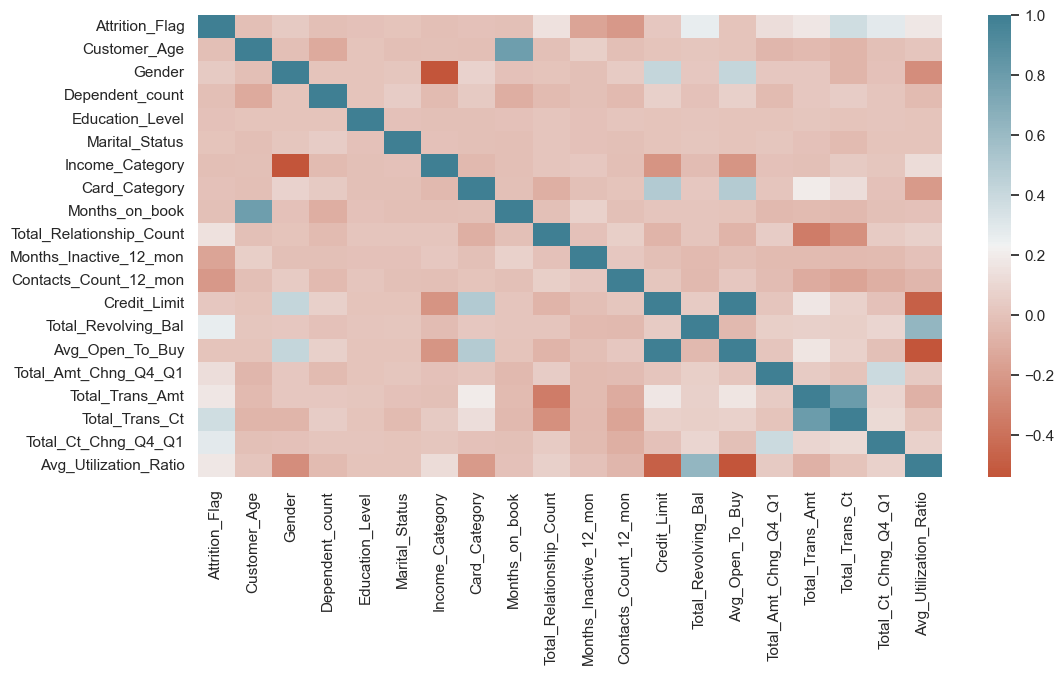

In [18]:
correlation1=df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation1,cmap = sns.diverging_palette(20, 220, n = 200), annot =False)
plt.show()

In [19]:
corre = df.corr()
corre.sort_values(["Attrition_Flag"], ascending = False, inplace = True)

In [20]:
corre

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,1.000000,-0.018203,0.037272,-0.018991,-0.005551,0.005146,-0.017584,-0.002354,-0.013687,0.150005,-0.152449,-0.204491,0.023873,0.263053,0.000285,0.131063,0.168598,0.371403,0.290054,0.178410
Total_Trans_Ct,0.371403,-0.067097,-0.067454,0.049912,0.003046,-0.031752,0.033498,0.134275,-0.049819,-0.241891,-0.042787,-0.152213,0.075927,0.056060,0.070885,0.005469,0.807192,1.000000,0.112324,0.002838
Total_Ct_Chng_Q4_Q1,0.290054,-0.012143,-0.005800,0.011087,0.007279,0.004333,0.014892,-0.007261,-0.014072,0.040831,-0.038989,-0.094997,-0.002020,0.089861,-0.010076,0.384189,0.085581,0.112324,1.000000,0.074143
Total_Revolving_Bal,0.263053,0.014780,0.029658,-0.002688,0.008029,0.019755,-0.025815,0.026304,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Utilization_Ratio,0.178410,0.007114,-0.257851,-0.037135,0.006477,-0.000154,0.123287,-0.198711,-0.007541,0.067663,-0.007503,-0.055471,-0.482965,0.624022,-0.538808,0.035235,-0.083034,0.002838,0.074143,1.000000
Total_Trans_Amt,0.168598,-0.046446,0.024890,0.025046,0.015287,-0.006265,-0.014686,0.196003,-0.038591,-0.347229,-0.036982,-0.112774,0.171730,0.064370,0.165923,0.039678,1.000000,0.807192,0.085581,-0.083034
Total_Relationship_Count,0.150005,-0.010931,0.003157,-0.039076,0.009636,0.006981,0.008138,-0.094077,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Total_Amt_Chng_Q4_Q1,0.131063,-0.062042,0.026712,-0.035439,0.005534,0.014736,-0.004534,0.007385,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235
Gender,0.037272,-0.017312,1.000000,0.004563,0.000694,0.015075,-0.539731,0.080093,-0.006728,0.003157,-0.011163,0.039987,0.420806,0.029658,0.418059,0.026712,0.024890,-0.067454,-0.005800,-0.257851
Credit_Limit,0.023873,0.002476,0.420806,0.068065,0.003076,0.003964,-0.225394,0.492446,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965


In [21]:
x=df[['Contacts_Count_12_mon','Months_Inactive_12_mon','Total_Amt_Chng_Q4_Q1','Total_Relationship_Count','Total_Trans_Amt','Avg_Utilization_Ratio','Total_Revolving_Bal','Total_Ct_Chng_Q4_Q1','Total_Trans_Ct']]
y=df['Attrition_Flag']

In [22]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#random_forest
model1=RandomForestClassifier(n_estimators=100)
model1.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
import pickle
pickle.dump(model1,open('churn_model.pkl','wb'))

In [88]:
model_pred=model1.predict(x_test)

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88       419
           1       0.97      0.98      0.98      2113

    accuracy                           0.96      2532
   macro avg       0.94      0.91      0.93      2532
weighted avg       0.96      0.96      0.96      2532



In [90]:
#logiatic_regression

model2=LogisticRegression().fit(x_train,y_train)
y_test_pred=model2.predict(x_test)
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.41      0.52       419
           1       0.89      0.97      0.93      2113

    accuracy                           0.88      2532
   macro avg       0.81      0.69      0.72      2532
weighted avg       0.86      0.88      0.86      2532



In [91]:
def predict_churn(features_array, model):
    prediction = model.predict(features_array.reshape(1, -1))  

    if prediction > 0.5:
        return "Customer will exist"
    else:
        return "Customer is churned fom your service! Improve ypur customer aquisition "

In [93]:
features_array = np.array([4, 2, 0.5, 5, 2000, 0.3, 1000, 0.2, 40])
result = predict_churn(features_array, model1)
print(result)

Customer will exist


C:\Users\Viraj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [97]:
features_array = np.array([3, 2, 3, 2, 692, 0.3, 800, 0.5, 35])
result = predict_churn(features_array, model1)
print(result)

Customer is churned fom your service! Improve ypur customer aquisition 


C:\Users\Viraj\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
